# __*Projet Black-Scholes*__
Cotel Erwan, Husseini Mohamad Ali, Caputo Manon


## __A. Qu’est-ce que le modèle de Black-Scholes ?__

### __a. Définitions :__


L'équation de __Black Scholes__ pour une option V s'écrit :

$$ 
\frac{\partial V}{ \partial t} + \frac{1}{2} \sigma^{2} S^{2} \frac{\partial ^{2} V}{ \partial S^{2}} +r S \frac{\partial V}{ \partial S} - r V =0
$$
On notera également :
- $\sigma$ la volatilité du prix de l’action ;
- $E$ le prix d’exercice fixé par l’option (appelé aussi le strike price);
- $T$ le temps qui reste à l’option avant son échéance ;
- $r$ le taux d’intérêt sans risque.

### __b. Options Call et Put :__

Pour un call le prix de cette option  $C(S,T)$ vérifie :
\
\
$\begin{cases}
\frac{\partial C}{ \partial t} + \frac{1}{2} \sigma^{2} S^{2} \frac{\partial ^{2} C}{ \partial S^{2}} +r S \frac{\partial C}{ \partial S} - r C =0 ,
\\
C(0,t)=0,
\\
C(S,t) \sim S, \ S \rightarrow +∞
\\
C(S,T)=max(S-E,0), \ \ \forall S
\end{cases}$


Pour un put le prix de cette option $P(S,T)$ vérifie :

$
\begin{cases}
\frac{\partial P}{ \partial t} + \frac{1}{2} \sigma^{2} S^{2} \frac{\partial ^{2} P}{ \partial S^{2}} +r S \frac{\partial P}{ \partial S} - r P =0 ,
\\
P(0,t)=Ee^{-\int_{t}^{T} r(\tau)d \tau}, \forall t
\\
P(S,t) \rightarrow  0, \ S \rightarrow +∞
\\
P(S,T)=max(E-S,0), \ \ \forall S
\end{cases}
$

## __B. Approche Numérique__

Pour supprimer les termes $S$ et $S^2$ on effectue un changement de variable : $ S = E e^x$, $t=T - \frac{\tau}{\frac{1}{2} \sigma^{2}}$, $C=Ev(x,\tau)$ et
$k=\frac{r}{\frac{1}{2} \sigma^{2}}$.
\
On obtient alors :
$$ 
\frac{\partial v}{ \partial \tau } = \frac{\partial ^{2} v}{ \partial x^{2}} +(k-1)\frac{\partial v}{ \partial x} - kv,
$$
La 3-ème condition  limite du call devient $v(x,0) = max(e^x-1,0) $,
\
On pose maintenant $v(x,\tau)=e^{\alpha x +\beta \tau} u(x, \tau)$
L'équation donne une simplification des termes en $u$ et $\frac{\partial u}{ \partial x}$ si $\alpha$ et $\beta$ vérifie les conditions :
$\alpha = \frac{1}{2} (1-k)$,  $\beta= \alpha^2 +(k-1) \alpha -k$, et $v(x,\tau)=e^{\alpha x + \beta \tau} u(x,\tau)$
\
Ce qui donne u solution de la l'équation de la chaleur :
$$
\frac{\partial u}{ \partial \tau } = \frac{\partial ^{2} u}{ \partial x^{2}}
$$


#




Maintenant grâce à cette simplification nous allons modéliser cette équation avec les DF.
Le schéma pour l'EDP de la chaleur avec les conditions de bords Dirichlet homogène est : 
\
\
$
\begin{cases}
 &\frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta \tau} + \frac{2u_{j}^{n}-u_{j+1}^{n}-u_{j-1}^{n}}{\Delta x^2} =0, \forall j= 1,..N,\\
 \\
 & u_{0}^{n+1}=0, \text{ et } u_{N+1}^{n+1} = e^{\frac{(k+1) (N+1)}{2}}. 
\end{cases}
$
\
\
Soit avec l'expression de $\lambda$ où $\lambda = \frac{ \Delta \tau} {\Delta x^2}$ :
\
\
$
\begin{cases}
 & u_{j}^{n+1}-u_{j}^{n} + \lambda(2u_{j}^{n}-u_{j+1}^{n}-u_{j-1}^{n}) =0, \forall j= 1,..N,\\
 \\
 & u_{0}^{n+1}=0, \text{ et } u_{N+1}^{n+1}=e^{[\frac{(k+1) (N+1)}{2}]}.
\end{cases} 
$

$
\Leftrightarrow  
$

$
\begin{cases}
 & u_{j}^{n+1} = (1-2 \lambda ) u_{j}^{n} +\lambda u_{j+1}^{n}+ \lambda u_{j-1}^{n} =0, \forall j= 1,..N,\\
 \\
 & u_{0}^{n+1}=0, \text{ et } u_{N+1}^{n+1}=e^{[\frac{(k+1) (N+1)}{2}]}.
\end{cases}
$

On implémente ce schéma dans le code suivant et s'inspirant des codes qu'on a pu faire lors du TP2 de l'equation de la chaleur :
La solution étant l'option call elle doit être nécessairement croissante 

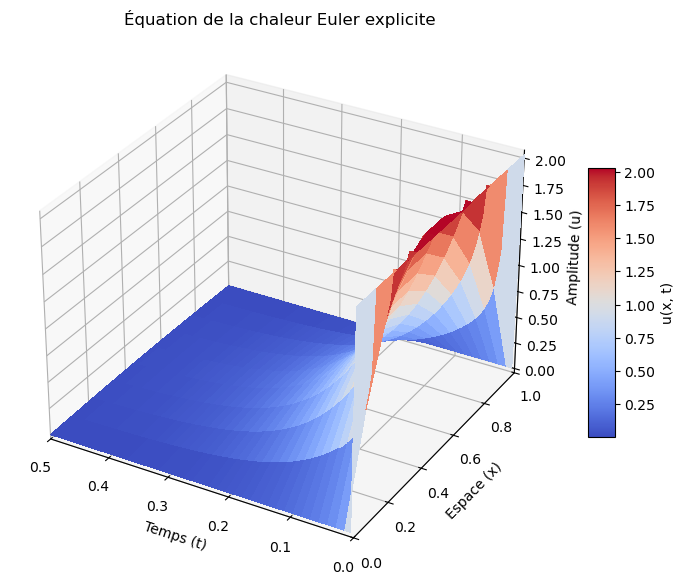

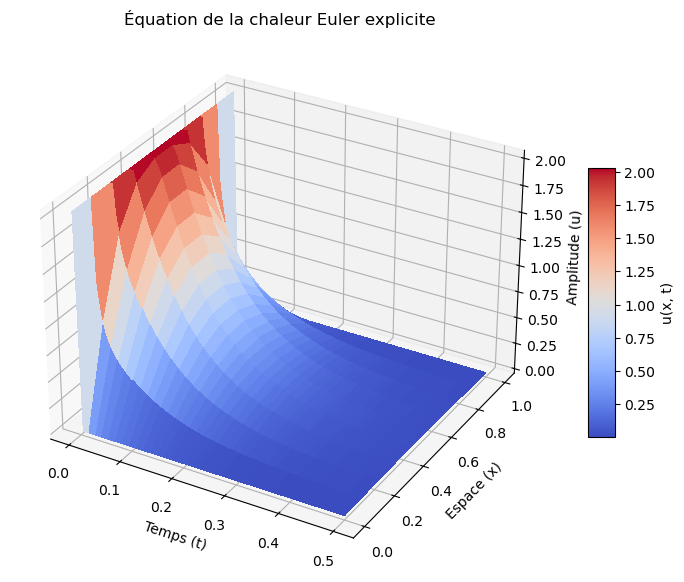

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter

# Fonction de résolution
def Resolution_Exp(N, M, mu, tf, L,sig,r):
    """
    Résolution numérique de l'équation de diffusion 1D avec un schéma explicite.

    Paramètres :
        N : Nombre de pas de temps
        M : Nombre de points spatiaux
        mu : Coefficient de diffusion
        tf : Temps final
        L : Longueur du domaine spatial
        k : hit price

    Retourne :
        I : Discrétisation temporelle
        J : Discrétisation spatiale
        Un : Solution numérique (N+1, M)
    """
    k=2*r/(sig*sig)
    dt = tf / N  # Pas de temps
    dx = L / (M - 1)  # Pas d'espace
    lambd = mu * dt / dx**2  # Coefficient CFL

    if lambd > 0.5:
        raise ValueError(f"Le schéma est instable pour lambda = {lambd:.2f}. Réduisez dt ou augmentez M.")

    # Discrétisation spatiale et temporelle
    I = np.linspace(0, tf, N+1)  # Temps
    J = np.linspace(0, L, M)    # Espace

    # Initialisation de la solution
    Un = np.zeros((N+1, M))  # Solution (temps, espace)

    # Condition limite : f
    Un[0, :] = np.max((np.exp(((k+1)/2)*J)-np.exp(((k-1)/2)*J)),0 )

    

    # Construction de la matrice pour le schéma explicite
    A = np.eye(M)  # Matrice identité
    for i in range(1, M-1):
        A[i, i-1] = lambd
        A[i, i+1] = lambd
        A[i, i] = 1 - 2 * lambd

    # Boucle en temps
    for n in range(N):
        Un[n+1, 1:-1] = A[1:-1, 1:-1] @ Un[n, 1:-1]
    
    #Un[N, M-1]=np.exp(((k+1)*(N)/2))  #+(M*(k+1)**2)/4)

    return I, J, Un

# version origines confondus
# Résolution avec les paramètres donnés
I, J, Un = Resolution_Exp(N=110, M=10, mu=1, tf=0.5, L=1, sig=0.3,r=0.06)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))


II, JJ = np.meshgrid(I, J)

surf = ax.plot_surface(II.T, JJ.T, Un, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)
ax.set_xlim(0.5, 0) 
ax.set_ylim(0,1)
# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

fig.colorbar(surf, shrink=0.5, aspect=10, label="u(x, t)")

# Labels des axes
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")

# Titre
ax.set_title("Équation de la chaleur Euler explicite")

# Afficher
plt.show()



# origines non confondues 
# Résolution avec les paramètres donnés
I, J, Un = Resolution_Exp(N=110, M=10, mu=1, tf=0.5, L=1, sig=0.3,r=0.06)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

# Générer les grilles pour l'affichage
II, JJ = np.meshgrid(I, J)

# Création de la surface
surf = ax.plot_surface(II.T, JJ.T, Un, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)

# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Ajout d'une barre de couleur
fig.colorbar(surf, shrink=0.5, aspect=10, label="u(x, t)")

# Labels des axes
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")

# Titre
ax.set_title("Équation de la chaleur Euler explicite")

# Afficher
plt.show()




On observe que la solution n'a pas les caractéristiques attendu car elle ne croit pas fonction de la variable d'espace. 
On améliore le code par la suite :

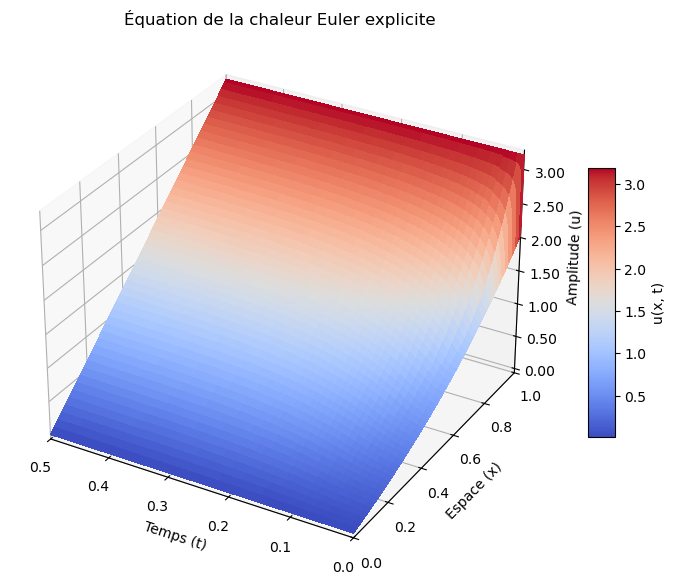

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
import scipy.stats as st

# Fonction de résolution
def Resolution_Exp2(N, M, mu, tf, L, sig, r):
    k = 2 * r / (sig * sig)
    dt = tf / N  # Pas de temps
    dx = L / (M - 1)  # Pas d'espace
    lambd = mu * dt / dx**2  # Coefficient CFL

    if lambd > 0.5:
        raise ValueError(f"Le schéma est instable pour lambda = {lambd:.2f}. Réduisez dt ou augmentez M.")

    # Discrétisation spatiale et temporelle
    I = np.linspace(0, tf, N+1)  # Temps
    J = np.linspace(0, L, M)    # Espace

    # Initialisation de la solution
    Un = np.zeros((N+1, M))  # Solution (temps, espace)

    # Condition initiale
    Un[0, :] = np.maximum(np.exp(((k+1)/2)*J) - np.exp(((k-1)/2)*J), 0)

    # Boucle en temps
    for n in range(N):
        for j in range(1, M-1):
            Un[n+1, j] = (1 - 2 * lambd) * Un[n, j] + lambd * (Un[n, j+1] + Un[n, j-1])
        
        # Conditions aux limites
        Un[n+1, 0] = 0
        Un[n+1, -1] = np.exp(((k+1)/2) * J[-1])

    return I, J, Un

# Résolution avec les paramètres donnés
I, J, Un = Resolution_Exp(N=11000, M=100, mu=1, tf=0.5, L=1, sig=0.3,r=0.06)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

# Générer les grilles pour l'affichage
II, JJ = np.meshgrid(I, J)

# Création de la surface
surf = ax.plot_surface(II.T, JJ.T, Un, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)
ax.set_xlim(0.5, 0)
ax.set_ylim(0,1)
# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Ajout d'une barre de couleur
fig.colorbar(surf, shrink=0.5, aspect=10, label="u(x, t)")

# Labels des axes
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")

# Titre
ax.set_title("Équation de la chaleur Euler explicite")

# Afficher
plt.show()



L'equation a bien la monotonie attendu

## __C. Discrétisation de l'équation (*)__
### __a. Euler Explicite__
On s'interesse par la suite à résoudre l'equation avec l'equation précedent celle de la chaleur :

$$ 
\frac{\partial v}{ \partial \tau } = \frac{\partial ^{2} v}{ \partial x^{2}} +(k-1)\frac{\partial v}{ \partial x} - kv,
$$

On utilise en premier lieu Euler explicite.

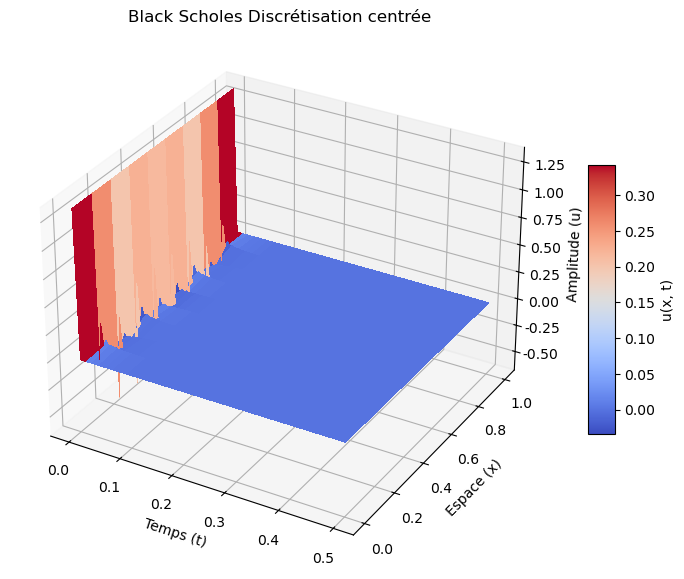

In [19]:
#%% cas centrée

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter

# Fonction de résolution
def Resolution_Exp(N, M, mu, tf, L,k):
    """
    Résolution numérique de l'équation de diffusion 1D avec un schéma explicite.

    Paramètres :
        N : Nombre de pas de temps
        M : Nombre de points spatiaux
        mu : Coefficient de diffusion
        tf : Temps final
        L : Longueur du domaine spatial
        k : hit price

    Retourne :
        I : Discrétisation temporelle
        J : Discrétisation spatiale
        Un : Solution numérique (N+1, M)
    """
    dt = tf / N  # Pas de temps
    dx = L / (M - 1)  # Pas d'espace
    alpha = mu * dt / dx**2  # Coefficient CFL
    beta=(k-1)*dt/(2*dx)
    gamma=-dt*k

    if alpha > 0.5:
        raise ValueError(f"Le schéma est instable pour lambda = {alpha:.2f}. Réduisez dt ou augmentez M.")

    # Discrétisation spatiale et temporelle
    I = np.linspace(0, tf, N+1)  # Temps
    J = np.linspace(0, L, M)    # Espace

    # Initialisation de la solution
    Un = np.zeros((N+1, M))  # Solution (temps, espace)

    # Condition initiale : fonction sinusoïdale
    Un[0, :] = np.max((np.exp(((k+1)/2)*J)-np.exp(((k-1)/2)*J)),0 )

    # Construction de la matrice pour le schéma explicite
    A = np.eye(M)  # Matrice identité
    for i in range(1, M-1):
        A[i, i-1] = -(alpha-gamma)
        A[i, i+1] = -(alpha+gamma)
        A[i, i] = 1 - 2 * alpha +gamma

    # Boucle en temps
    for n in range(N):
        Un[n+1, 1:-1] = A[1:-1, 1:-1] @ Un[n, 1:-1]

    return I, J, Un

# Résolution avec les paramètres donnés
I, J, Un = Resolution_Exp(N=110, M=10, mu=1, tf=0.5, L=1,k=1/2)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

# Générer les grilles pour l'affichage
II, JJ = np.meshgrid(I, J)

# Création de la surface
surf = ax.plot_surface(II.T, JJ.T, Un, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)

# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Ajout d'une barre de couleur
fig.colorbar(surf, shrink=0.5, aspect=10, label="u(x, t)")

# Labels des axes
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")

# Titre
ax.set_title("Black Scholes Discrétisation centrée")

# Afficher
plt.show()


On observe qu'une methode explicite se révèle instable 

### __b. Méthodes implicites équation et dérivées premières centrées et décentrées aux sens des DF__

$$ 
\frac{\partial v}{ \partial \tau } = \frac{\partial ^{2} v}{ \partial x^{2}} +(k-1)\frac{\partial v}{ \partial x} - kv,
$$

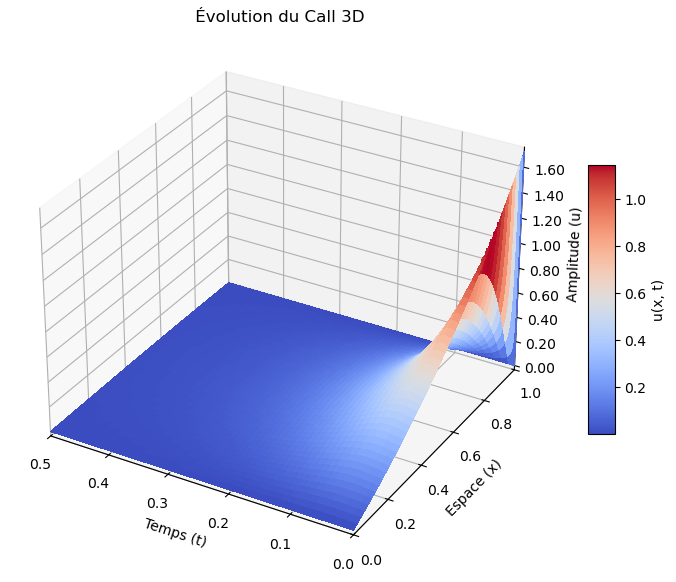

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter


# Fonction de résolution
def Resolution_Exp(N, M, mu, tf, L, k):
    """
    Résolution numérique de l'équation de diffusion 1D avec un schéma explicite.

    Paramètres :
        N : Nombre de pas de temps
        M : Nombre de points spatiaux
        mu : Coefficient de diffusion
        tf : Temps final
        L : Longueur du domaine spatial
        k : hit price

    Retourne :
        I : Discrétisation temporelle
        J : Discrétisation spatiale
        Un : Solution numérique (N+1, M)
    """
    dt = tf / N  # Pas de temps
    dx = L / (M - 1)  # Pas d'espace
    alpha = mu * dt / dx ** 2  # Coefficient CFL
    beta = (k - 1) * dt / (2 * dx)
    gamma = -dt * k

    if alpha > 0.5:
        raise ValueError(f"Le schéma est instable pour lambda = {alpha:.2f} > 0.5. Réduisez dt ou augmentez M.")

    if gamma > 1:
        raise ValueError(f"Le schéma est instable pour gamma = k*dt = {gamma:.2f} > 1. Réduisez dt ou augmentez M.")

    # Discrétisation spatiale et temporelle
    I = np.linspace(0, tf, N + 1)  # Temps
    J = np.linspace(0, L, M)  # Espace

    # Initialisation de la solution
    Un = np.zeros((N + 1, M))  # Solution (temps, espace)

    # Condition initiale :
    for i in range(M):
        Un[0,i] = np.max((np.exp(J[i]) - 1), 0)

    A = np.eye(M)  # Matrice identité
    if k - 1 > 0:
        for i in range(1, M - 1):
            A[i, i - 1] = -(alpha - 2 * beta) / (1 + gamma)
            A[i, i + 1] = -(alpha) / (1 + gamma)
            A[i, i] = -(1 - 2 * alpha + 2 * beta) / (1 + gamma)

    # SI K - 1 EST NEGATIF

    if k - 1 < 0:
        for i in range(1, M - 1):
            A[i, i - 1] = -(alpha) / (1 + gamma)
            A[i, i + 1] = -(alpha + 2 * beta) / (1 + gamma)
            A[i, i] = -(1 - 2 * alpha - 2 * beta) / (1 + gamma)

    # Boucle en temps
    for n in range(N):
        Un[n + 1, 1:-1] = np.abs(A[1:-1, 1:-1] @ Un[n, 1:-1])

    return I, J, Un


# Résolution avec les paramètres donnés
I, J, Un = Resolution_Exp(N=11100, M=100, mu=1, tf=0.5, L=1, k=1 / 2)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

# Générer les grilles pour l'affichage
II, JJ = np.meshgrid(I, J)

# Création de la surface
surf = ax.plot_surface(II.T, JJ.T, Un, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)
ax.set_xlim(0.5, 0)  # t est normalisé entre 0 et 1
ax.set_ylim(0,1)
# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Ajout d'une barre de couleur
fig.colorbar(surf, shrink=0.5, aspect=10, label="u(x, t)")

# Labels des axes
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")

# Titre
ax.set_title(" Évolution du Call 3D ")

# Afficher
plt.show()


Avec le terme $(i+1, i, i-1)$ donné par :
$$
-\frac{C_i^{n+1} - C_i^n}{\Delta t} + \left(k - 1\right) \frac{C_{i+1}^{n+1}-C_i^{n+1}}{\Delta x} + \frac{C_{i+1}^{n+1} + C_{i-1}^{n+1} - 2C_i^{n+1}}{\Delta x^2} - k C_i^{n+1} = 0
$$

En réorganisant, on obtient :
$$
(1+k\Delta t + \frac{(k - 1) \Delta t}{\Delta x} + \frac{2 \Delta t}{\Delta x^2}) C_i^{n+1} = \left[a C_{i-1}^{n+1}\right] + \left[b C_i^{n}\right] + \left[c C_{i+1}^{n+1}\right] 
$$
où :
$$
c = \frac{(k - 1) \Delta t}{\Delta x} + \frac{\Delta t}{\Delta x^2}, \quad a = \frac{\Delta t}{\Delta x^2}, \quad b = 1  
$$

### Matrice A et Résolution
Matrice $A$ (composée de $a$, $b$, $c$) :
$$
A = \frac{1}{(1+k \Delta t)} \begin{bmatrix}
  b & c & 0 & 0 & \cdots & 0 \\
  a & b & c & 0 & \cdots & 0 \\
  0 & a & b & c & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & a & b
\end{bmatrix}
$$

Sous forme matricielle, l'équation devient :
$$
\bm{X}^{n+1} = A \bm{X}^n + \bm{B}
$$
où $\bm{B}$ représente les termes de bord. 
$$ 
B= \frac{1}{(1+k \Delta t)} \begin{bmatrix}
  a C_{0}^n \\
  0 \\
  \vdots \\
  0 \\
  c C_{M}^n  
\end{bmatrix}
$$


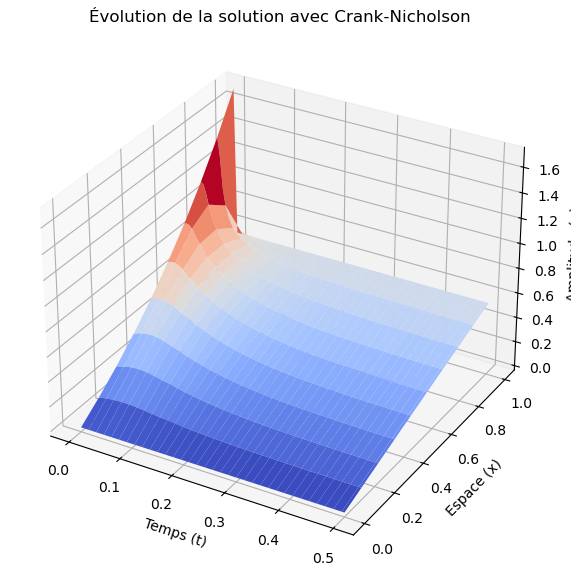

In [26]:
import numpy as np

def Schema_Crank_Nicholson(N, M, mu=1, tf=0.5, L=1, u_left=0):
    """
    Schéma de Crank-Nicholson pour l'équation de la chaleur.

    Paramètres :
        N : Nombre de pas de temps
        M : Nombre de points en espace
        mu : Coefficient de diffusion
        tf : Temps final
        L : Longueur de l'intervalle spatial
        u0 : Condition initiale (fonction définissant u(x, 0))
        u_left : Condition limite à gauche (x = 0, Dirichlet)
        u_right : Condition limite à droite (x = L, Dirichlet)

    Retourne :
        t : Discrétisation temporelle
        x : Discrétisation spatiale
        U : Matrice contenant la solution à chaque pas de temps
    """
    # Pas de temps et d'espace
    dt = tf / N
    dx = L / (M - 1)
    alpha = mu * dt / (dx ** 2)

    # Vérification de la stabilité
    if alpha <= 0 or alpha > 1:
        raise ValueError(f"Le schéma est instable pour alpha = {alpha:.2f}. Ajustez les paramètres.")

    # Discrétisations temporelle et spatiale
    t = np.linspace(0, tf, N + 1)
    x = np.linspace(0, L, M)

    u_right = np.exp(x[-1])
    # Initialisation de la solution
    U = np.zeros((N + 1, M))
    for i in range(M):
        U[0,i] = np.max((np.exp(x[i]) - 1), 0)  # Condition initiale

    # Construction des matrices tridiagonales
    A = np.zeros((M, M))  # Matrice pour le système à résoudre
    B = np.zeros((M, M))  # Matrice pour le second membre

    # Matrice A (1 + alpha sur la diagonale, -alpha/2 sur les bandes adjacentes)
    for i in range(1, M - 1):
        A[i, i - 1] = -alpha / 2
        A[i, i] = 1 + alpha
        A[i, i + 1] = -alpha / 2
    A[0, 0] = A[-1, -1] = 1  # Conditions aux limites (Dirichlet)

    # Matrice B (1 - alpha sur la diagonale, +alpha/2 sur les bandes adjacentes)
    for i in range(1, M - 1):
        B[i, i - 1] = alpha / 2
        B[i, i] = 1 - alpha
        B[i, i + 1] = alpha / 2
    B[0, 0] = B[-1, -1] = 1  # Conditions aux limites (Dirichlet)

    # Résolution itérative dans le temps
    for n in range(N):
        # Second membre (produit matrice-vecteur)
        b = B @ U[n, :]
        b[0] = (alpha/2)*u_left  # Condition limite gauche
        b[-1] = (alpha/2)*u_right  # Condition limite droite

        # Résolution du système linéaire
        U[n + 1, :] = np.linalg.solve(A, b)

    return t, x, U

# Exemple d'utilisation
L = 1  # Longueur du domaine spatial
tf = 0.5  # Temps final
mu = 1  # Coefficient de diffusion
N = 100  # Nombre de pas de temps
M = 10  # Nombre de points spatiaux

# Condition initiale (exemple : une fonction gaussienne)
u0 = lambda x: np.maximum(np.exp(x) - 1, 0)

# Résolution avec Crank-Nicholson
t, x, U = Schema_Crank_Nicholson(N, M, mu, tf, L,)

# Affichage des résultats
import matplotlib.pyplot as plt
from matplotlib import cm

X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, X, U, cmap=cm.coolwarm)
ax.set_xlabel("Temps (t)")
ax.set_ylabel("Espace (x)")
ax.set_zlabel("Amplitude (u)")
plt.title("Évolution de la solution avec Crank-Nicholson")
plt.show()


<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/182579981.py:55: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f"Graphique de la solution analytique de Black-Scholes pour $\sigma$ = {sig}, E = {E} et r = {100*r}% ")
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/182579981.py:16: RuntimeWarning: divide by zero encountered in divide
  r1=(1/(sig*np.sqrt(T-t[:, None])))*np.log(S/E) - (k+1)*sig*np.sqrt(T-t[:, None])
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/182579981.py:16: RuntimeWarning: divide by zero encountered in log
  r1=(1/(sig*np.sqrt(T-t[:, None])))*np.log(S/E) - (k+1)*sig*np.sqrt(T-t[:, None])
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/182579981.py:16: RuntimeWarning: invalid value encountered in multiply
  r1=(1/(sig*np.sqrt(T-t[:, None])))*np.log(S/E) - (k+1)*sig*np.sqrt(T-t[:, None])


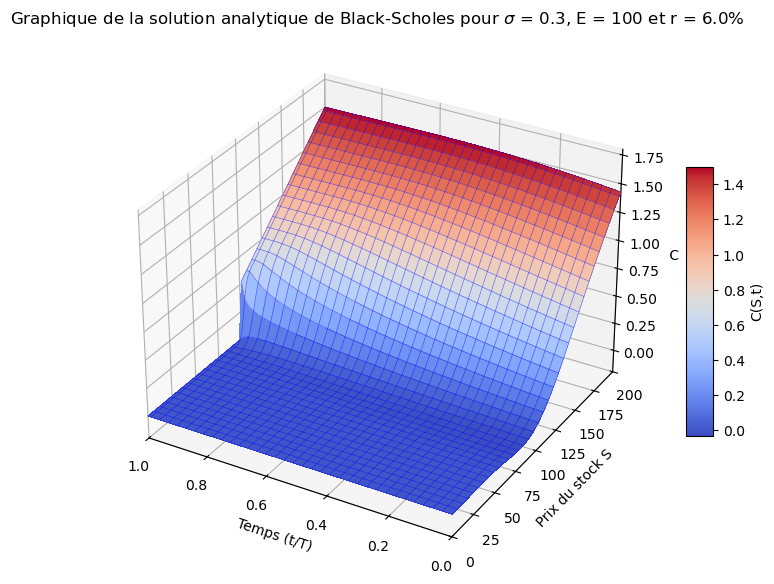

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
import scipy.stats as st

def SolutionAn(N, M, mu=1,tf=10 , L=200, r=0.06,sig=0.3,E=100):
    T=tf
    k=2*r/(sig*sig)
    t= np.linspace(0,T,N+1)
    #x=np.linspace(0,L,M)
    S=np.linspace(0,L,M)
    N= lambda y : st.norm.cdf(y , loc = 0, scale = 1) #fonction de répartition de la loi normale


    r1=(1/(sig*np.sqrt(T-t[:, None])))*np.log(S/E) - (k+1)*sig*np.sqrt(T-t[:, None])
    r2=(1/(sig*np.sqrt(T-t[:, None])))*np.log(S/E) - (k-1)*sig*np.sqrt(T-t[:, None])

    C = (S/E)*N(r1) - (1/2)*(np.exp(-r*(T-t[:, None])))*N(r2)

    return t/T, S, C

# Résolution avec les paramètres donnés
sig=0.3
E=100
r=0.06
t, S, C = SolutionAn(N=100,M=101,mu=1,tf=1,L=200,r=r,sig=sig,E=E)

# Affichage en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

# Générer les grilles pour l'affichage
tt, SS = np.meshgrid(t, S)

# Création de la surface
surf = ax.plot_surface(tt.T, SS.T, C, cmap=cm.coolwarm,  # Notez le `.T` pour aligner les dimensions
                       linewidth=0, antialiased=False)
wire = ax.plot_wireframe(tt.T, SS.T, C, color='blue', linewidth=0.5, alpha=0.5)
# Ajuster les limites pour aligner les origines
ax.set_xlim(1, 0)  # t est normalisé entre 0 et 1
ax.set_ylim(0,200)  # S est défini de 0 à L
ax.set_zlim(-0.2, 1.8)
# Formater l'axe Z avec deux décimales
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Ajout d'une barre de couleur
fig.colorbar(surf, shrink=0.5, aspect=10, label="C(S,t)")

# Labels des axes
ax.set_xlabel("Temps (t/T)")
ax.set_ylabel(" Prix du stock S")
ax.set_zlabel(" C ")

# Titre
ax.set_title(f"Graphique de la solution analytique de Black-Scholes pour $\sigma$ = {sig}, E = {E} et r = {100*r}% ")

# Afficher
plt.show()


## __D. Calcul de l'erreur des schéma étudiées__
### __a. Calcul de l'erreur par l'équation de la chaleur__

/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/929807528.py:48: RuntimeWarning: divide by zero encountered in divide
  r1 = (1 / (sig * np.sqrt(T - t[:, None]))) * np.log(S / E) - (k + 1) * sig * np.sqrt(T - t[:, None])
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/929807528.py:48: RuntimeWarning: divide by zero encountered in log
  r1 = (1 / (sig * np.sqrt(T - t[:, None]))) * np.log(S / E) - (k + 1) * sig * np.sqrt(T - t[:, None])
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/929807528.py:49: RuntimeWarning: divide by zero encountered in divide
  r2 = (1 / (sig * np.sqrt(T - t[:, None]))) * np.log(S / E) - (k - 1) * sig * np.sqrt(T - t[:, None])
/var/folders/wj/gwkw935x797187ls7qhxc2q00000gn/T/ipykernel_46320/929807528.py:49: RuntimeWarning: divide by zero encountered in log
  r2 = (1 / (sig * np.sqrt(T - t[:, None]))) * np.log(S / E) - (k - 1) * sig * np.sqrt(T - t[:, None])


Ordre de convergence = -0.00


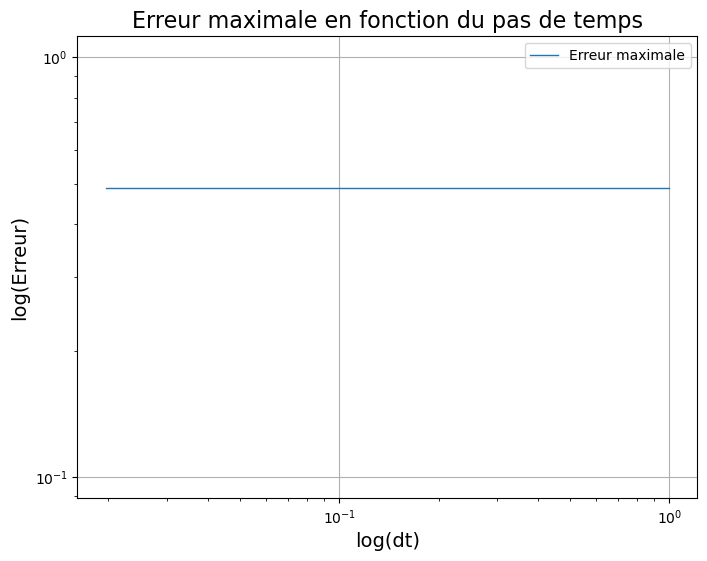

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def erreur_max(SolutionAn, Resolution_Exp, r, sig, tf, L, E, N_values):
    """
    Calcule l'erreur maximale entre la solution numérique et la solution analytique.

    Paramètres :
        SolutionAn : Fonction donnant la solution analytique
        Resolution_Exp : Fonction donnant la solution numérique
        r : Taux d'intérêt
        sig : Volatilité
        tf : Temps final
        L : Longueur du domaine spatial
        E : Strike price
        N_values : Array contenant les valeurs de discrétisation temporelle

    Retourne :
        dt_values : Pas de temps associés aux discrétisations
        erreurs_max : Liste des erreurs maximales correspondantes
    """
    erreurs_max = []  # Pour stocker les erreurs maximales
    dt_values = tf / N_values  # Pas de temps correspondant

    for N in N_values:
        # Calcul de la solution numérique
        I, J, Un = Resolution_Exp(N=N, M=10, mu=1, tf=tf, L=L,sig=sig,r=r)

        # Calcul de la solution analytique pour les mêmes instants temporels et positions spatiales
        t_scaled, S, C_exact = SolutionAn(N=N, M=10, mu=1, tf=tf, L=L, r=r, sig=sig, E=E)

        # Interpolation pour aligner les grilles (si nécessaire)
        C_numerique = Un[-1, :]  # On prend la dernière ligne (t = tf)
        #C_analytique = np.interp(J, S, C_exact[-1, :])  # Interpolation pour aligner S et J

        # Calcul de l'erreur maximale (norme infinie)
        erreur = np.max(np.abs(C_analytique - C_exact))
        erreurs_max.append(erreur)

    return dt_values, erreurs_max

# Paramètres
sig = 0.3
r = 0.06
tf = 1
L = 200
E = 100
N_values = np.arange(1, 100, 50)  # Valeurs de discrétisation temporelle (pas de temps)

# Calcul des erreurs maximales
dt_values, erreurs_max = erreur_max(SolutionAn, Resolution_Exp, r, sig, tf, L, E, N_values)

# Affichage du graphe log-log
plt.figure(figsize=(8, 6))
plt.loglog(dt_values, erreurs_max, label="Erreur maximale", linewidth=1)
plt.xlabel('log(dt)', fontsize=14)
plt.ylabel('log(Erreur)', fontsize=14)
plt.title("Erreur maximale en fonction du pas de temps", fontsize=16)
plt.legend()
plt.grid(True)

# Calcul de l'ordre de convergence
ordre_convergence = np.polyfit(np.log(dt_values), np.log(erreurs_max), 1)[0]
print(f"Ordre de convergence = {ordre_convergence:.2f}")

# Affichage
plt.show()


## __Bibliographie :__
### __*Sites :*__
- the-big-win: Modèle Black Scholes : définition, formules et exemples faciles,https://the-big-win.com/modele-black-scholes, (2022)
- Veritasium. (2024, 27 février). The trillion dollar equation [Vidéo]. YouTube.https://www.youtube.com/watch?v=A5w-dEgIU1M

### __*Livres et documents :*__
- David, C., & Gosselet, P. (2015). Equations aux dérivées partielles : Cours et exercices corrigés. Partie 7.5, p. 178-182
- Didier, A. (2010). Méthodes numériques pour le pricing d’options[Fichier PDF]. https://math.univ-cotedazur.fr/~auroux/IMAFA/MNPO.pdf

